## Store Sales Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [5]:
def create_dataframe(data):
    return pd.DataFrame(data)

def calculate_total_profit(df):
    df['net_revenue_per_product'] = (df['retail_price'] - df['wholesale_price']) * df['sales']

def display_styled_dataframe(df):
    styled_df = df.style.format({
        'wholesale_price': '${:.2f}',
        'retail_price': '${:.2f}',
        'net_revenue_per_product': '${:,.2f}',
        'wholesale_price_discounted': '${:.2f}',
        'new_net_revenue': '${:,.2f}'
    }).bar(subset=['sales'], color='lightblue').highlight_max(subset=['net_revenue_per_product'], color='lightgreen')
    
    display(styled_df)

def total_net_revenue(df):
    return df['net_revenue_per_product'].sum()

def retail_price_more_than_twice_wholesale(df):
    return df[df['retail_price'] > 2 * df['wholesale_price']][['name', 'retail_price', 'wholesale_price']]

def revenue_by_category(df):
    food_revenue = df[df['name'].isin(['banana', 'sandwich'])]['net_revenue_per_product'].sum()
    computer_revenue = df[df['name'] == 'computer']['net_revenue_per_product'].sum()
    books_revenue = df[df['name'].isin(['Python Workout', 'Pandas Workout'])]['net_revenue_per_product'].sum()
    return food_revenue, computer_revenue, books_revenue

def calculate_discounted_net_revenue(df):
    df['wholesale_price_discounted'] = df['wholesale_price'] * 0.7
    df['new_net_revenue'] = (df['retail_price'] - df['wholesale_price_discounted']) * df['sales']

def calculate_net_income_with_tax(df, tax_rate):
    df[f'net_income_tax_{int(tax_rate * 100)}'] = df['net_revenue_per_product'] * (1 - tax_rate)

In [6]:
def visualize_data(df):
  # Bar chart for Net Revenue per Product
    plt.figure(figsize=(6, 3))
    plt.bar(df['name'], df['net_revenue_per_product'], color='skyblue')
    plt.title('Net Revenue per Product')
    plt.xlabel('Product Name')
    plt.ylabel('Net Revenue')
    plt.xticks(rotation=45)
    plt.show()

    # Scatter plot for Wholesale vs. Retail Price
    plt.figure(figsize=(6,6))
    plt.scatter(df['wholesale_price'], df['retail_price'], color='green')
    plt.title('Scatter Plot of Wholesale vs. Retail Price')
    plt.xlabel('Wholesale Price')
    plt.ylabel('Retail Price')
    plt.show()

def print_tabulated_results(results, title):
    print(f"\n{title}")
    print(tabulate(results, headers='keys', tablefmt='pretty'))


,product_id,name,wholesale_price,retail_price,sales,net_revenue_per_product
0,23,computer,$500.00,$1000.00,100,"$50,000.00"
1,96,Python Workout,$35.00,$75.00,1000,"$40,000.00"
2,97,Pandas Workout,$35.00,$75.00,500,"$20,000.00"
3,15,banana,$0.50,$1.00,200,$100.00
4,87,sandwich,$3.00,$5.00,300,$600.00



Total Net Revenue
+----------------------------------+
| Total Net Revenue from all sales |
+----------------------------------+
|             110700.0             |
+----------------------------------+

Products with Retail Price more than Twice Wholesale Price
+---+----------------+--------------+-----------------+
|   |      name      | retail_price | wholesale_price |
+---+----------------+--------------+-----------------+
| 1 | Python Workout |      75      |      35.0       |
| 2 | Pandas Workout |      75      |      35.0       |
+---+----------------+--------------+-----------------+

Revenue by Category
+--------------+------------------+---------------+
| Food Revenue | Computer Revenue | Books Revenue |
+--------------+------------------+---------------+
|    700.0     |     50000.0      |    60000.0    |
+--------------+------------------+---------------+


,product_id,name,wholesale_price,retail_price,sales,net_revenue_per_product,wholesale_price_discounted,new_net_revenue,net_income_tax_15,net_income_tax_20,net_income_tax_25
0,23,computer,$500.00,$1000.00,100,"$50,000.00",$350.00,"$65,000.00",42500.000000,40000.000000,37500.000000
1,96,Python Workout,$35.00,$75.00,1000,"$40,000.00",$24.50,"$50,500.00",34000.000000,32000.000000,30000.000000
2,97,Pandas Workout,$35.00,$75.00,500,"$20,000.00",$24.50,"$25,250.00",17000.000000,16000.000000,15000.000000
3,15,banana,$0.50,$1.00,200,$100.00,$0.35,$130.00,85.000000,80.000000,75.000000
4,87,sandwich,$3.00,$5.00,300,$600.00,$2.10,$870.00,510.000000,480.000000,450.000000


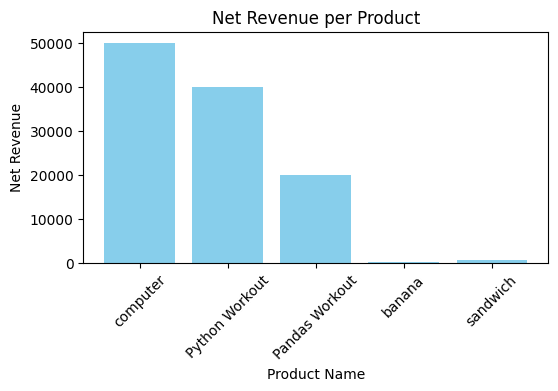

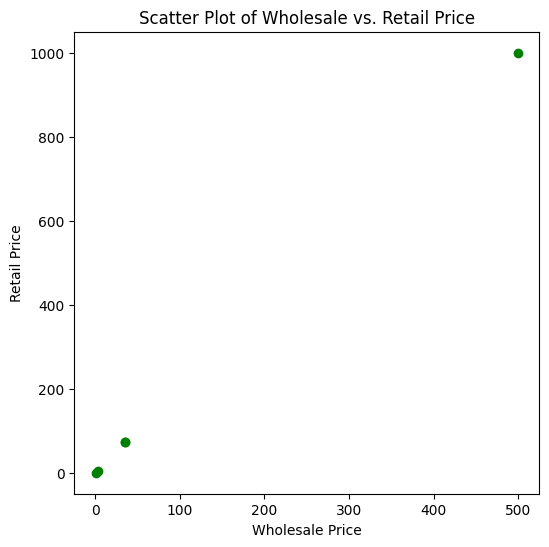

In [7]:
def main():
    data = [
        {'product_id': 23, 'name': 'computer', 'wholesale_price': 500, 'retail_price': 1000, 'sales': 100},
        {'product_id': 96, 'name': 'Python Workout', 'wholesale_price': 35, 'retail_price': 75, 'sales': 1000},
        {'product_id': 97, 'name': 'Pandas Workout', 'wholesale_price': 35, 'retail_price': 75, 'sales': 500},
        {'product_id': 15, 'name': 'banana', 'wholesale_price': 0.5, 'retail_price': 1, 'sales': 200},
        {'product_id': 87, 'name': 'sandwich', 'wholesale_price': 3, 'retail_price': 5, 'sales': 300}
    ]

    df = create_dataframe(data)

    calculate_total_profit(df)

    display_styled_dataframe(df)
    total_revenue = total_net_revenue(df)
    twice_price_products = retail_price_more_than_twice_wholesale(df)
    food, computer, books = revenue_by_category(df)

    print_tabulated_results({'Total Net Revenue from all sales': [total_revenue]}, 'Total Net Revenue')
    print_tabulated_results(twice_price_products, 'Products with Retail Price more than Twice Wholesale Price')
    print_tabulated_results({'Food Revenue': [food], 'Computer Revenue': [computer], 'Books Revenue': [books]}, 'Revenue by Category')

    calculate_discounted_net_revenue(df)

    tax_rates = [0.15, 0.20, 0.25]
    
    for tax_rate in tax_rates:
        calculate_net_income_with_tax(df, tax_rate)

    # Display the styled DataFrame
    display_styled_dataframe(df)

    # Visualizations
    visualize_data(df)

if __name__ == "__main__":
    main()